# Social Media Analytics

Daily and weekly view charts for two networks.

In [5]:

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def load_totals(path):
    """Return daily view data from Totals.csv."""
    dataframe = pd.read_csv(path, parse_dates=['Date'])
    dataframe = dataframe.rename(columns={'Date': 'date', 'Views': 'views'})
    return dataframe

def load_overview(path):
    """Return daily view data from Overview.csv."""
    dataframe = pd.read_csv(path, encoding='utf-8-sig')
    dataframe = dataframe.rename(columns={'Date': 'date', 'Video Views': 'views'})
    dataframe['date'] = pd.to_datetime(dataframe['date'] + ' 2024', format='%B %d %Y')
    return dataframe

def combine_networks(totals, overview):
    """Combine dataframes into daily series for each network."""
    totals_df = totals.set_index('date')
    overview_df = overview.set_index('date')
    start_date = max(totals_df.index.min(), overview_df.index.min())
    end_date = min(totals_df.index.max(), overview_df.index.max())
    full_range = pd.date_range(start_date, end_date, freq='D')
    merged = pd.DataFrame(index=full_range)
    merged['YouTube'] = totals_df['views']
    merged['TikTok'] = overview_df['views']
    merged = merged.fillna(0)
    return merged

def plot_daily_views(dataframe, output_path):
    """Save SVG line chart of daily views."""
    axis = dataframe.plot(figsize=(10, 6))
    axis.set_title('Daily Views by Network')
    axis.set_xlabel('Date')
    axis.set_ylabel('Views')
    axis.set_yscale('log')
    axis.legend()
    axis.figure.savefig(output_path, format='svg')

def plot_recent_weekly_views(dataframe, output_path):
    """Save SVG line chart of weekly views for the last three months."""
    end_date = dataframe.index.max()
    start_date = end_date - pd.DateOffset(months=3)
    recent = dataframe.loc[start_date:end_date]
    weekly = recent.resample('W').sum()
    axis = weekly.plot(figsize=(10, 6))
    axis.set_title('Weekly Views Last Three Months')
    axis.set_xlabel('Week')
    axis.set_ylabel('Views')
    axis.set_yscale('log')
    axis.legend()
    axis.figure.savefig(output_path, format='svg')


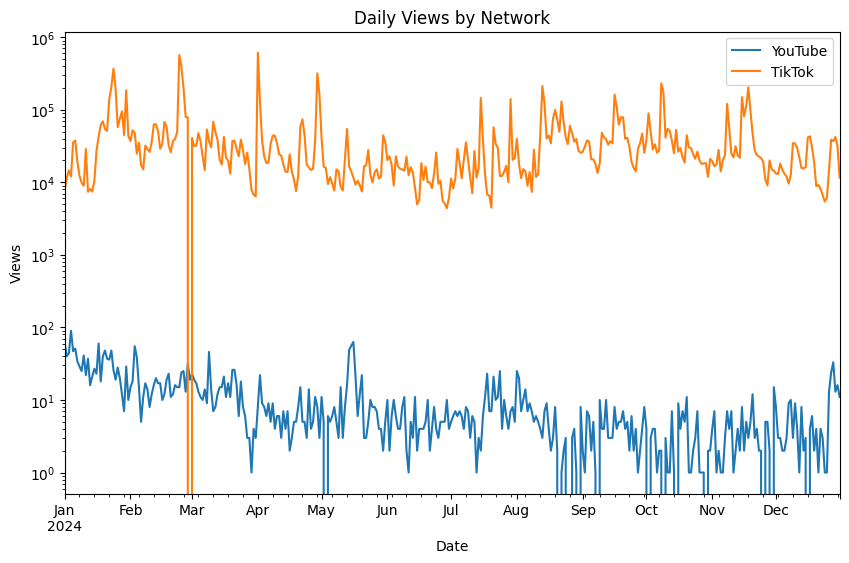

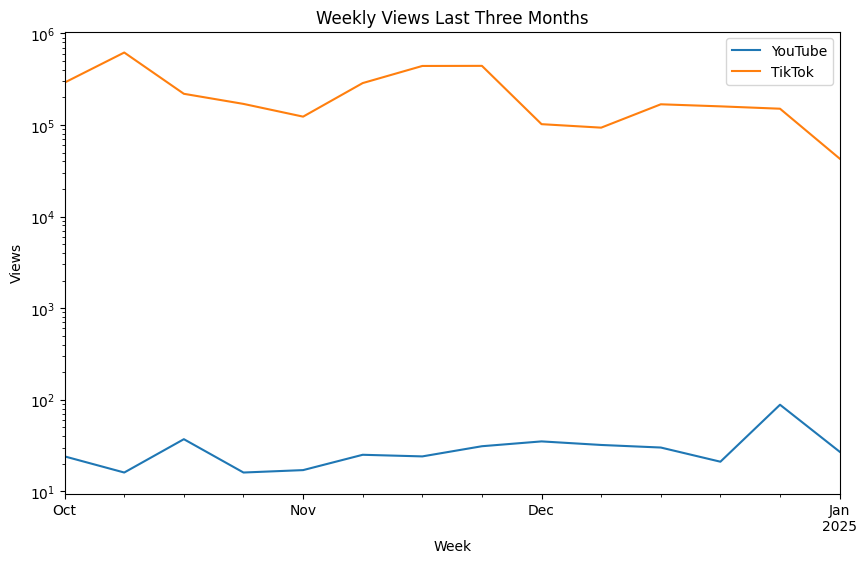

In [6]:

from pathlib import Path

youtube_path = Path('social') / 'youtube' / 'Totals.csv'
tiktok_path = Path('social') / 'tiktok' / 'Overview.csv'

youtube = load_totals(youtube_path)
tiktok = load_overview(tiktok_path)
combined = combine_networks(youtube, tiktok)

plot_daily_views(combined, 'daily_views.svg')
plot_recent_weekly_views(combined, 'weekly_views.svg')
